# question 1 set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use chsarts for this comparison.
(5 points)

In [1]:

import pandas as pd

# Import the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')


In [2]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Select a random sample of 25 observations
sample = diabetes['Glucose'].sample(n=25, random_state=1)


In [4]:
sample

285    136
101    151
581    109
352     61
726    116
472    119
233    122
385    119
556     97
59     105
756    137
341     95
445    180
614    138
371    118
355    165
19     115
711    126
430     99
117     78
493    125
218     85
159    163
667    111
553     88
Name: Glucose, dtype: int64

In [5]:
# Calculate sample statistics
sample_mean = sample.mean()
sample_max = sample.max()
print(sample_mean)
print(sample_max)

118.32
180


In [6]:
# Calculate population statistics
pop_mean = diabetes['Glucose'].mean()
pop_max = diabetes['Glucose'].max()


In [14]:
print(pop_mean)
print(pop_max)

120.89453125
199


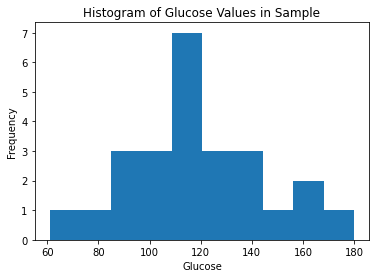

In [8]:
import matplotlib.pyplot as plt

# Create a histogram of the sample data
plt.hist(sample, bins=10)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Values in Sample')
plt.show()


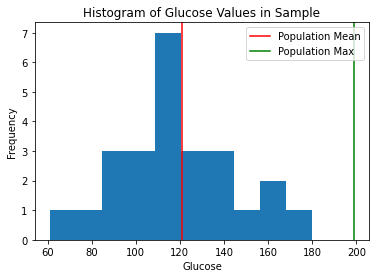

In [9]:
# Add population statistics to the histogram
plt.hist(sample, bins=10)
plt.axvline(pop_mean, color='red', label='Population Mean')
plt.axvline(pop_max, color='green', label='Population Max')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Values in Sample')
plt.legend()
plt.show()


In [10]:
# Select a random sample of 25 observations
sample = diabetes['BMI'].sample(n=25, random_state=1)


In [11]:
sample

285    26.0
101    26.1
581    25.0
352    34.4
726    36.1
472    38.8
233    35.0
385    22.3
556    38.1
59     41.5
756    32.0
341    25.9
445    59.4
614    36.1
371     0.0
355    30.4
19     34.6
711    29.6
430    22.2
117    33.7
493    28.9
218    29.0
159    40.9
667    27.5
553    29.9
Name: BMI, dtype: float64

In [12]:
import numpy as np

# Calculate the 98th percentile of BMI for the sample and population
sample_98th_percentile = np.percentile(sample, 98)
pop_98th_percentile = np.percentile(diabetes['BMI'], 98)


In [13]:
print(sample_98th_percentile)
print(pop_98th_percentile)

50.80799999999999
47.52599999999996


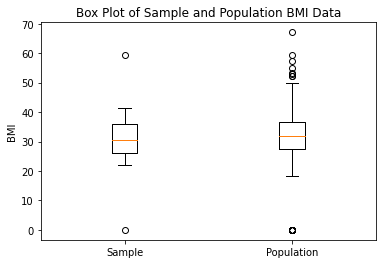

In [15]:
import matplotlib.pyplot as plt

# Create a box plot of the sample and population data
data = [sample, diabetes['BMI']]
plt.boxplot(data, labels=['Sample', 'Population'])
plt.ylabel('BMI')
plt.title('Box Plot of Sample and Population BMI Data')
plt.show()


# Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

In [16]:
#Create a function to calculate the statistics
#We can create a function that takes a sample as input and calculates the mean,
#standard deviation, and percentile of the BloodPressure variable.

In [17]:
def calculate_stats(sample):
    mean = sample['BloodPressure'].mean()
    std_dev = sample['BloodPressure'].std()
    percentile = np.percentile(sample['BloodPressure'], 95)
    return mean, std_dev, percentile


In [18]:
# Create 500 bootstrap samples:
# We can use the numpy random.choice() function to create 500 bootstrap samples of 150 observations each.

In [21]:
import numpy as np
bootstrap_samples = []
for i in range(500):
    bootstrap_sample = np.random.choice(diabetes['BloodPressure'], size=150, replace=True)
    bootstrap_samples.append(bootstrap_sample)

In [22]:
print(bootstrap_sample)

[ 70  90  98  88  68  72  64  70  54  60  24  48  82  70  58   0 100  72
  60  96  72  80  70  82  74  90  58  74  64  60  70  66  88  86  78  54
  78  68  50  90  64  70  62  54  70  64  74  68  72  58  76  65  84  64
  64  88   0  82  66  82  72  74  74  62  88  64  70  62  68  65  78  70
  48 114  86  64  94  80  66  50  72  50  58  76  86  70  70  64  90  66
  60  80  64  70  84  58  62  44  64  80   0  50  90  66  74  76  70  60
  62  68  72  58  76  68  60  70  62  82  68  80  60  80  78  76  76  66
  68  58  64  70  64  68  84  62  74  76  70  82  66  68  94  76  72   0
  78  82  70  68  70  68]


In [27]:
# Calculate the statistics for each bootstrap sample
def calculate_stats(sample):
    mean = np.mean(sample)
    std_dev = np.std(sample)
    percentile = np.percentile(sample, 95)
    return mean, std_dev, percentile

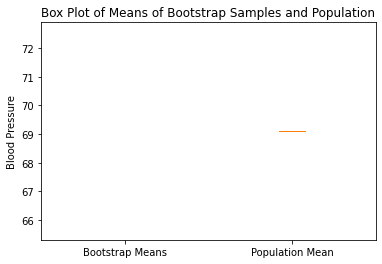

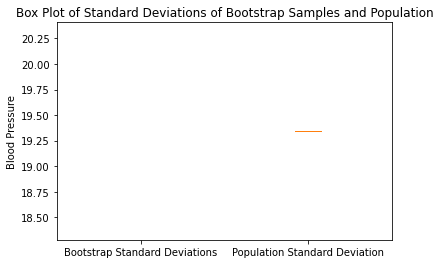

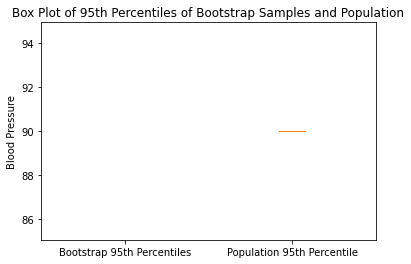

In [28]:
# Calculate the statistics for the population data
pop_mean = np.mean(diabetes['BloodPressure'])
pop_std_dev = np.std(diabetes['BloodPressure'])
pop_percentile = np.percentile(diabetes['BloodPressure'], 95)

# Create box plots of the mean, standard deviation, and percentile for the bootstrap samples and the population data
bootstrap_means = [sample_stats[0] for sample_stats in bootstrap_stats]
bootstrap_std_devs = [sample_stats[1] for sample_stats in bootstrap_stats]
bootstrap_percentiles = [sample_stats[2] for sample_stats in bootstrap_stats]

data = [bootstrap_means, [pop_mean]*500]
plt.boxplot(data, labels=['Bootstrap Means', 'Population Mean'])
plt.ylabel('Blood Pressure')
plt.title('Box Plot of Means of Bootstrap Samples and Population')
plt.show()

data = [bootstrap_std_devs, [pop_std_dev]*500]
plt.boxplot(data, labels=['Bootstrap Standard Deviations', 'Population Standard Deviation'])
plt.ylabel('Blood Pressure')
plt.title('Box Plot of Standard Deviations of Bootstrap Samples and Population')
plt.show()

data = [bootstrap_percentiles, [pop_percentile]*500]
plt.boxplot(data, labels=['Bootstrap 95th Percentiles', 'Population 95th Percentile'])
plt.ylabel('Blood Pressure')
plt.title('Box Plot of 95th Percentiles of Bootstrap Samples and Population')
plt.show()
